In [160]:
import pandas as pd
import seaborn as sb

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


data = pd.read_csv('datasets/titanic.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [161]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<Axes: xlabel='Survived', ylabel='count'>

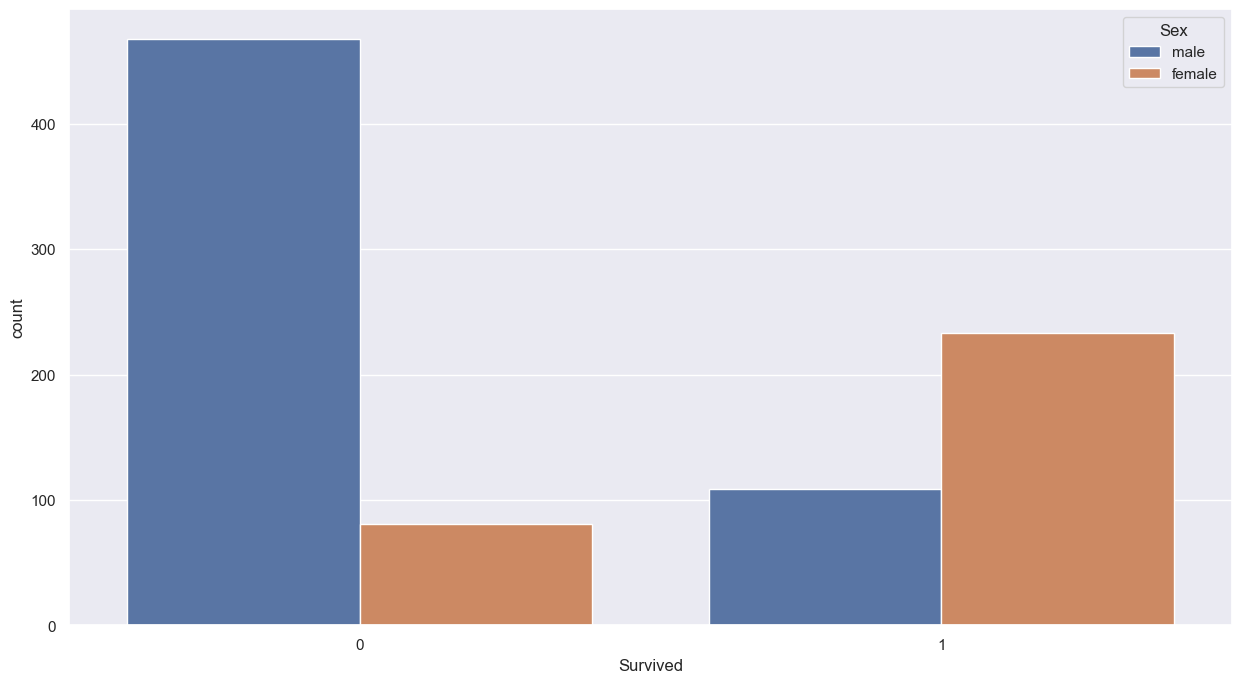

In [162]:
sb.countplot(x="Survived", data=data, hue="Sex")

In [163]:
data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

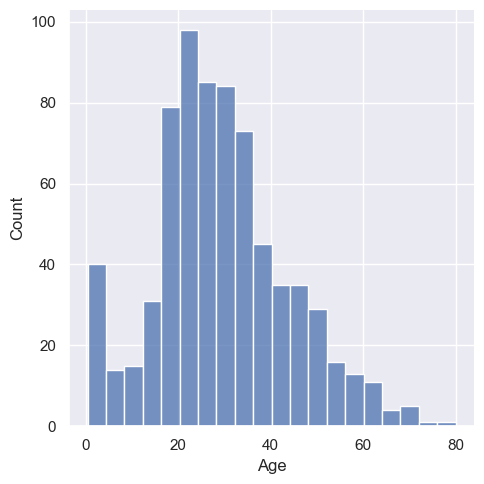

In [164]:
sb.displot(x='Age', data=data)

In [165]:
# Fill the empty age data with the mean
data["Age"] = data["Age"].fillna(data["Age"].mean())

# Remove the cabin column
data = data.drop(columns=["Cabin"], axis=1)

data = data.dropna()

data = data.drop(columns=["Name", "PassengerId", "Ticket"], axis=1)

# Dummies
dummies_gender = pd.get_dummies(data["Sex"], dtype=int, drop_first=True)
data = data.join(dummies_gender)
data = data.drop(columns=["Sex"], axis=1)

<Axes: >

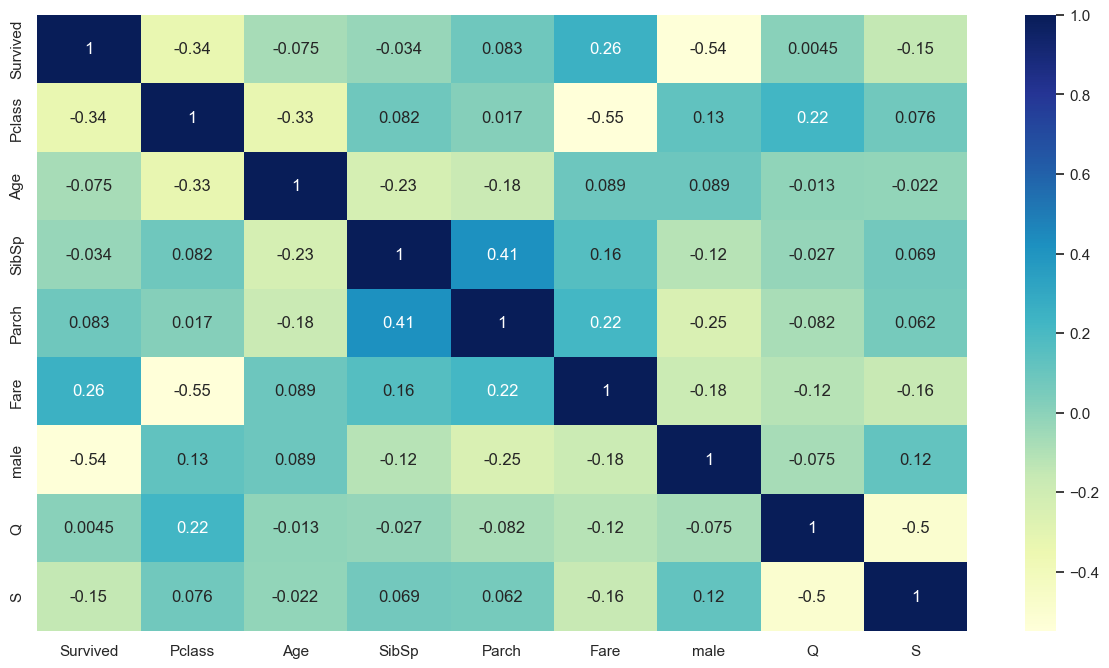

In [166]:
dummies_embarked = pd.get_dummies(data["Embarked"], dtype=int, drop_first=True)
data = data.join(dummies_embarked)
data = data.drop(columns=["Embarked"], axis=1)

data.head()

sb.set(rc={"figure.figsize": (15, 8)})
sb.heatmap(data.corr(), annot=True, cmap="YlGnBu")

<Axes: xlabel='Survived', ylabel='count'>

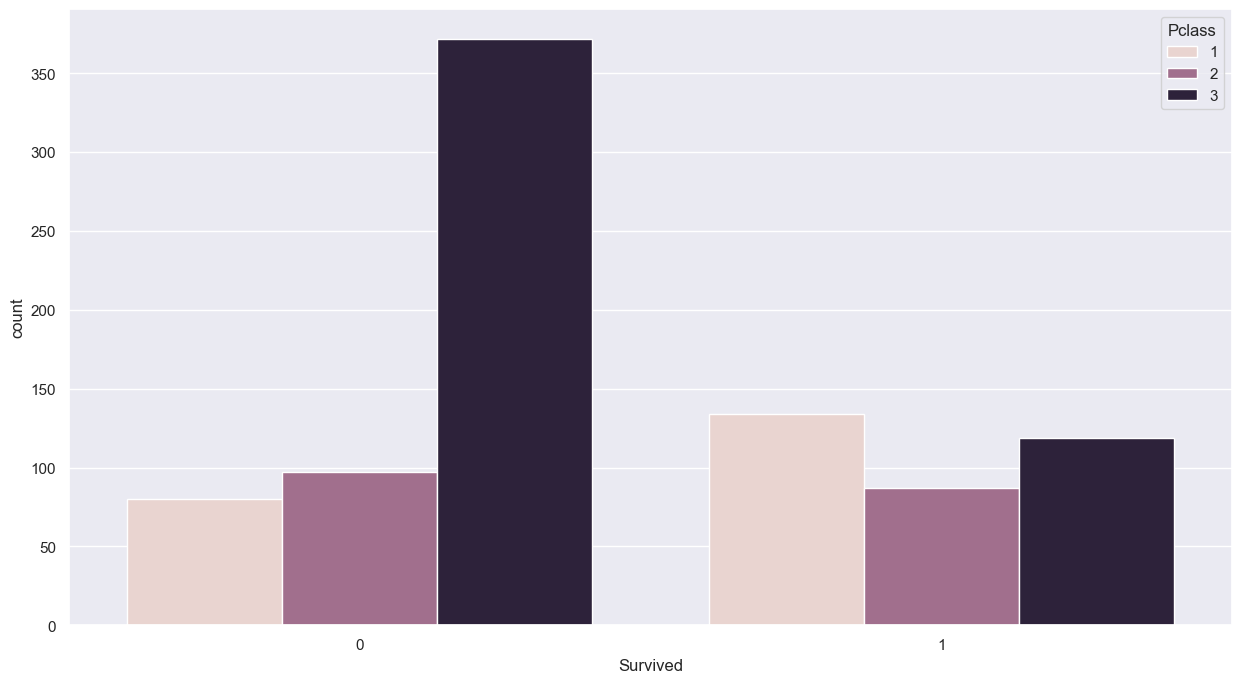

In [167]:
sb.countplot(x='Survived', data=data, hue='Pclass')

In [168]:
x = data.drop("Survived", axis=1)
y = data["Survived"]

# Train models

x_test, x_train, y_test, y_train = train_test_split(x, y, test_size=0.3)

model = LogisticRegression(max_iter=1000)
model.fit(x_train, y_train)

# Predictions
predictions = model.predict(x_test)

print(accuracy_score(y_test, predictions))

print(classification_report(y_test, predictions))

0.7893890675241158
              precision    recall  f1-score   support

           0       0.80      0.88      0.84       385
           1       0.77      0.65      0.70       237

    accuracy                           0.79       622
   macro avg       0.78      0.76      0.77       622
weighted avg       0.79      0.79      0.79       622



In [169]:
pd.DataFrame(
    confusion_matrix(y_test, predictions),
    columns=["Pred: No", "Pred: Yes"],
    index=["Real: No", "Real: Yes"],
)

,Pred: No,Pred: Yes
Real: No,338,47
Real: Yes,84,153


In [170]:
x.head()

headers = ["Pclass", "Age", "SibSp", "Parch", "Fare", "male", "Q", "S"]
new_passenger = pd.DataFrame([[1, 26, 0, 0, 80, 1, 0, 0]], columns=headers)

new_prediction = model.predict(new_passenger)

if new_prediction[0] == 1:
    print("Survived")
else:
    print("Died")

Survived
